In [1]:
from collections import defaultdict
import numpy as np
from itertools import product
from scipy.special import gamma
from scipy.spatial.distance import pdist, squareform, euclidean
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from random import randint
from sklearn.linear_model import LinearRegression
import math
from functions_for_clustering import *
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances
from sklearn import metrics

In [2]:
df = pd.read_csv('data/test/part_0.csv')
df.head(-1)

,Ticker,index,Date,extremum,-1,-2,-3,-4,-5,-6,...,-275,-276,-277,-278,-279,-280,-281,-282,-283,-284
0,000001.SS,243.0,2021-02-19,1.0,0.979912,0.960347,0.910541,0.841968,0.807106,0.812443,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,000002.SS,242.0,2021-02-19,1.0,0.979962,0.960403,0.910585,0.842046,0.807224,0.812541,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,000019.SZ,45.0,2020-04-24,1.0,0.819562,0.655986,0.507589,0.372681,0.246206,0.229342,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,000020.SZ,95.0,2020-07-10,1.0,0.835148,0.807154,0.720062,0.665630,0.606532,0.552100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,000020.SZ,238.0,2021-02-05,0.0,0.018663,0.041991,0.041991,0.041991,0.068429,0.125972,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11145,1K2.BE,178.0,2020-11-02,0.0,0.229788,0.275362,0.273881,0.271602,0.270805,0.272628,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11146,1K4.F,86.0,2020-06-25,0.0,0.003555,0.003555,0.024882,0.046209,0.167064,0.167064,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11147,1K5.F,156.0,2020-10-01,0.0,0.053628,0.053628,0.053628,0.066021,0.008562,0.014196,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11148,1K5.F,289.0,2021-04-14,1.0,0.954935,0.909869,0.954935,0.833258,0.842271,0.837765,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#extracting data
df_temp = df.drop(labels=['Ticker', 'index', 'Date', 'extremum'], axis=1)

key1 = -15
key2 = min([int(x) for x in df_temp.columns])

df_temp = df_temp.drop(labels=[str(x) for x in list(range(key2,key1))], axis=1)
df_temp = df_temp.loc[df_temp.index < 4000]  #тут было 4000 (ну так, чисто на всякий)
df_temp = df_temp.dropna(axis=0)

clustering_data_trended = df_temp.values.tolist()
clustering_data = detrend(clustering_data_trended)
clustering_data

[[0.09567757949038935,
  0.07850921276866407,
  0.031099636539952957,
  -0.035077460817802275,
  -0.06754305752797063,
  -0.059809976181992575,
  -0.04250119130435803,
  -0.02429690823751518,
  -0.04931478790248833,
  -0.06836134424736895,
  -0.044626181575073365,
  0.023565753043055637,
  0.022186904656419815,
  0.07748790718347554,
  0.06300391411261175],
 [0.09562086289557714,
  0.07847026750292951,
  0.031060842069861483,
  -0.03507038936061713,
  -0.0674835927114189,
  -0.05975743087818097,
  -0.042454180206825454,
  -0.024230932446398623,
  -0.04926574117415228,
  -0.06840367402873981,
  -0.04467863703569286,
  0.02352789984010839,
  0.02219222511118868,
  0.07750060943817605,
  0.06297187098418422],
 [0.28442951512209347,
  0.14624578510852304,
  0.02323948453393082,
  -0.08627640858842783,
  -0.18736048802947666,
  -0.17883247292708418,
  -0.14838190706590673,
  -0.08926366912613792,
  -0.08242185194738652,
  -0.03173534528261723,
  0.04424635520715059,
  0.09999195008070594,
 

In [5]:
#creating z-functions for everything
from functions_for_clustering import *
clustering_data_z_optimized = []
for i in clustering_data:
    clustering_data_z_optimized.append(generate_z_vector_best(i,(key1//-3)))
print(clustering_data_z_optimized)

[[0, 4, 7, 9, 13, 12], [0, 4, 7, 9, 13, 12], [0, 4, 10, 6, 12, 13], [1, 4, 6, 9, 14, 12], [0, 4, 10, 6, 12, 14], [3, 1, 9, 7, 12, 14], [1, 3, 6, 8, 14, 12], [0, 4, 10, 6, 12, 14], [2, 4, 6, 10, 14, 13], [2, 0, 9, 10, 13, 14], [0, 4, 10, 6, 14, 12], [3, 4, 10, 9, 13, 14], [4, 1, 6, 10, 12, 14], [0, 4, 10, 6, 14, 12], [4, 1, 9, 10, 12, 14], [0, 2, 9, 7, 14, 12], [3, 1, 9, 6, 12, 14], [0, 3, 10, 8, 14, 12], [3, 1, 9, 7, 12, 14], [0, 4, 10, 6, 12, 13], [0, 1, 6, 8, 12, 14], [1, 4, 10, 6, 12, 13], [0, 3, 6, 8, 12, 14], [2, 1, 6, 10, 12, 14], [0, 4, 9, 7, 14, 13], [3, 0, 10, 8, 14, 12], [4, 2, 9, 7, 14, 12], [0, 2, 10, 6, 14, 13], [3, 1, 7, 10, 12, 14], [0, 1, 9, 7, 12, 14], [0, 4, 6, 10, 12, 14], [0, 4, 6, 7, 12, 13], [0, 4, 6, 8, 13, 12], [4, 2, 9, 8, 13, 14], [3, 0, 7, 9, 14, 12], [3, 1, 6, 7, 14, 12], [0, 3, 6, 8, 12, 14], [0, 4, 10, 6, 14, 12], [0, 1, 9, 7, 13, 12], [0, 4, 8, 6, 12, 13], [0, 1, 9, 7, 12, 14], [4, 2, 7, 9, 12, 14], [0, 3, 8, 7, 12, 14], [0, 2, 10, 9, 12, 14], [0, 3, 10, 

In [34]:
clustering_result = get_clustering(clustering_data_z_optimized, 2, 1)
clustering_result

C:\Users\steph\Documents\GitHub\TimeSeries\functions_for_clustering.py:103: RuntimeWarning: divide by zero encountered in double_scalars
  p = [k / (volume(dk[i], m) * n) for i in range(n)]
C:\Users\steph\Documents\GitHub\TimeSeries\functions_for_clustering.py:18: RuntimeWarning: invalid value encountered in double_scalars
  max_diff = max(abs(p[i] - p[j]) for i, j in product(cluster, cluster))


array([152, 152, 168, ..., 113,  24, 144])

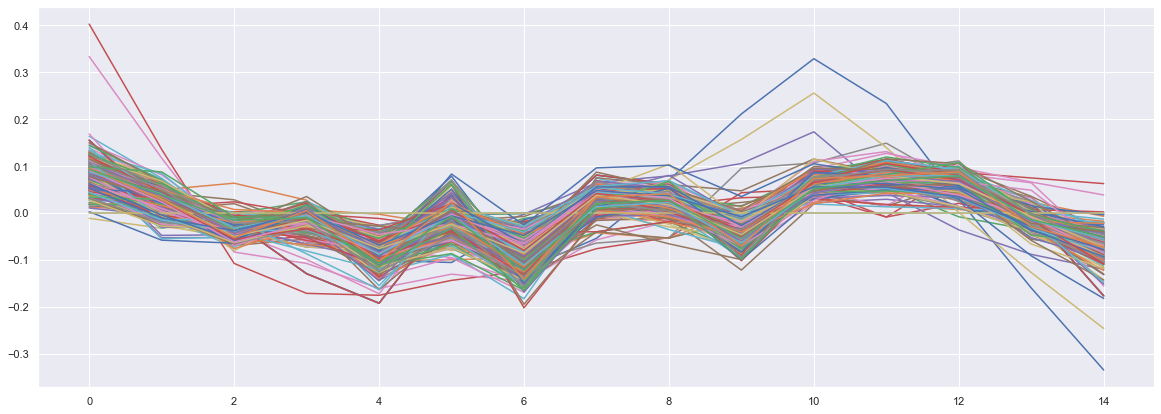

In [35]:
sns.set(rc={'figure.figsize':(20,7)})

visualization_data = []
for i in range(len(clustering_result)):
    if clustering_result[i] == max(set(clustering_result), key=list(clustering_result).count):
        visualization_data.append(clustering_data[i])
        
visualization_index = list(range(len(clustering_data[0])))
for i in visualization_data:
    sns.lineplot(y=i, x=visualization_index)

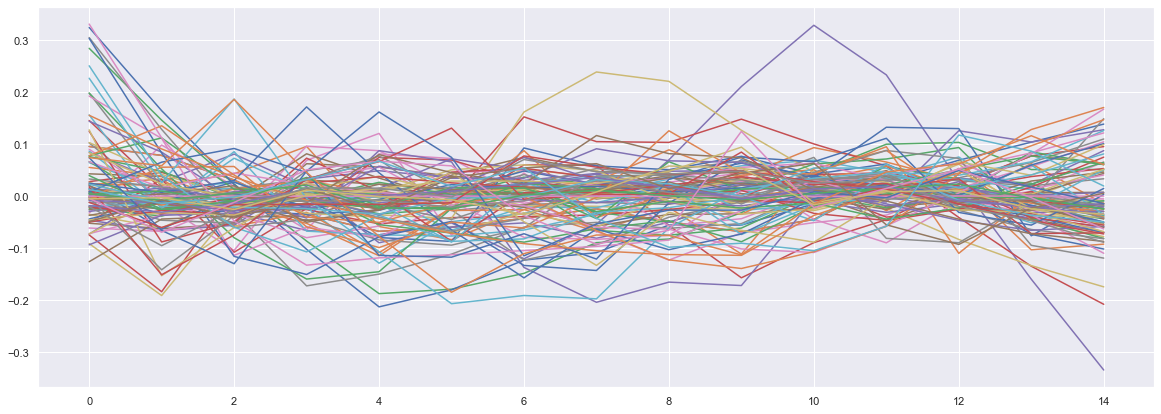

In [14]:
visualization_data = []
for i in range(len(clustering_result)):
    visualization_data.append(clustering_data[i])
    
visualization_index = list(range(len(clustering_data[0])))
for i in visualization_data:
    sns.lineplot(y=i, x=visualization_index)

<AxesSubplot:>

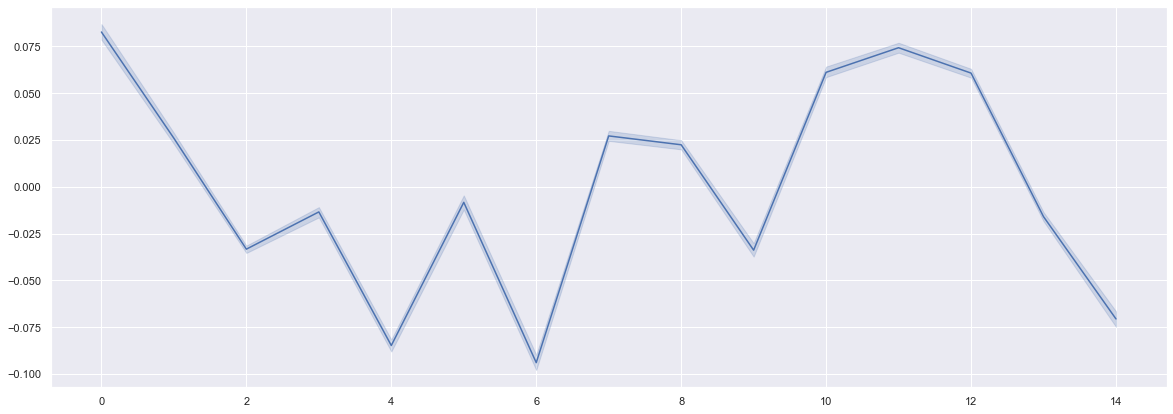

In [42]:
visualization_data_temp = []
for i in range(len(clustering_result)):
    if clustering_result[i] == max(set(clustering_result), key=list(clustering_result).count):
        visualization_data_temp.append(clustering_data[i])

visualization_data_flat = np.array(visualization_data_temp).flatten()        
visualization_index_flat = np.array(list(range(len(clustering_data[0])))*len(visualization_data_temp)).flatten()


sns.lineplot(y=visualization_data_flat, x=visualization_index_flat)

<AxesSubplot:>

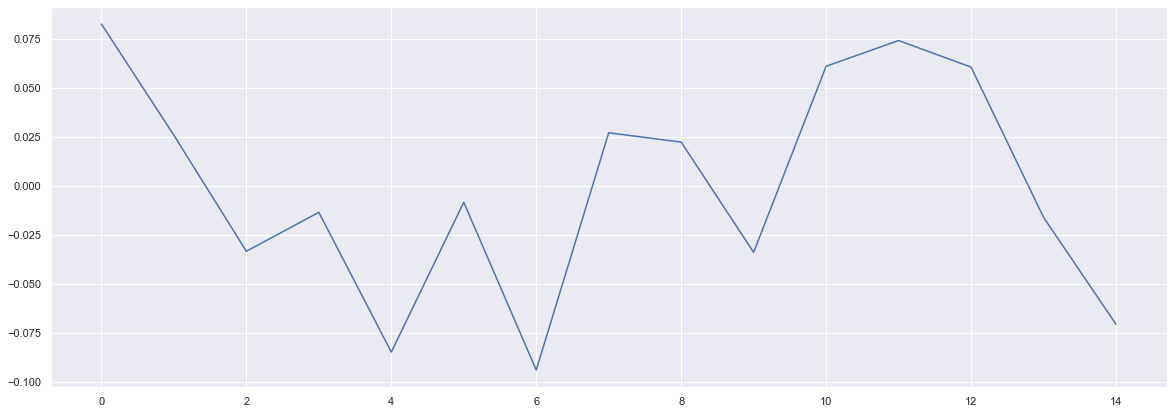

In [66]:
visualization_data = []
for i in range(len(clustering_result)):
    if clustering_result[i] == max(set(clustering_result), key=list(clustering_result).count):
        visualization_data.append(clustering_data[i])
        
visualization_index = list(range(len(clustering_data[0])))
    
motif = generate_motif(visualization_data)

sns.lineplot(y=motif, x=visualization_index)

In [13]:
visualization_data = []
for i in range(len(clustering_result)):
    if clustering_result[i] == max(set(clustering_result), key=list(clustering_result).count):
        visualization_data.append(clustering_data[i])
        
neighborhood = []
visualization_index = list(range(len(clustering_data[0])))
visualization_data_flat = np.array(visualization_data).flatten()
visualization_index_flat = np.array(list(range(len(clustering_data[0])))*len(visualization_data)).flatten()
for i in visualization_index:
    neighborhood.append(find_boundaries(visualization_data, visualization_data_flat, i))
neighborhood = np.transpose(neighborhood)
motif2 = [(neighborhood[0][x]+neighborhood[1][x])/2 for x in list(range(len(neighborhood[1])))]
sns.lineplot(y=neighborhood[0], x=visualization_index)
sns.lineplot(y=neighborhood[1], x=visualization_index)
sns.lineplot(y=motif2, x=visualization_index)

KeyboardInterrupt: 

In [12]:
def find_boundaries(visualization_data, visualization_data_flat, time_stamp):
    distance = max(visualization_data_flat) - min(visualization_data_flat)
    #distance2 = math.hypot(max(motif), min(motif))
    #distance3 = abs(max(motif))*math.sqrt(1 + (min(motif)/max(motif))**2)
    scale = np.arange(min(visualization_data_flat),max(visualization_data_flat), distance/100)

    count_on_scale = [0]*len(scale)
    for scale_range_index in range(len(scale)-1):
        for time_series in visualization_data:
            if scale[scale_range_index] < time_series[time_stamp] < scale[scale_range_index + 1]:
                count_on_scale[scale_range_index] += 1

    for i in range(len(count_on_scale)):
        if count_on_scale[i] <= 0.65*max(count_on_scale):
            count_on_scale[i] = 0

    boundaries = []
    index_max = count_on_scale.index(max(count_on_scale))
    for i in range(index_max, 0, -1):
        if count_on_scale[i] == 0:
            boundaries.append(scale[i])
            break
    for i in range(index_max, len(count_on_scale)):
        if count_on_scale[i] == 0:
            boundaries.append(scale[i])
            break
    return boundaries

## Clustering validation starts in 3... 2... 1...

In [37]:
labels = list(clustering_result)
X = clustering_data

metrics.silhouette_score(X, labels, metric='euclidean')

-0.33506809504319746

## Сюда будем записывать результаты кластеризации

| Версия z-vector | Кол-во элементов в кластеризации | Silhouette score | Вердикт |
| :-: | :-: | :-: | :-:|
| Старая (min - max) | 4000 | -0.335068 | Полная хуйня - quite a lot of samples (series) have been assigned to wrong clusters |  